# Normalization

Этапы:
* Background correction
* Normalization
* Summarization

https://math.usu.edu/jrstevens/stat5570/1.4.preprocess_4up.pdf

In [ ]:
# Установка пакетов oligo, oligoData
# Можно этот пункт пропустить, если у Вас пакеты
# oligo и oligoData установлены
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("oligo")
BiocManager::install("oligoData")

In [1]:
library("oligo")
library("oligoData")
data(affyExpressionFS)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: oligoClasses

Welcome to oligoClasses version 1.50.0

Loading required package: Bi

Loading required package: RSQLite

Loading required package: DBI



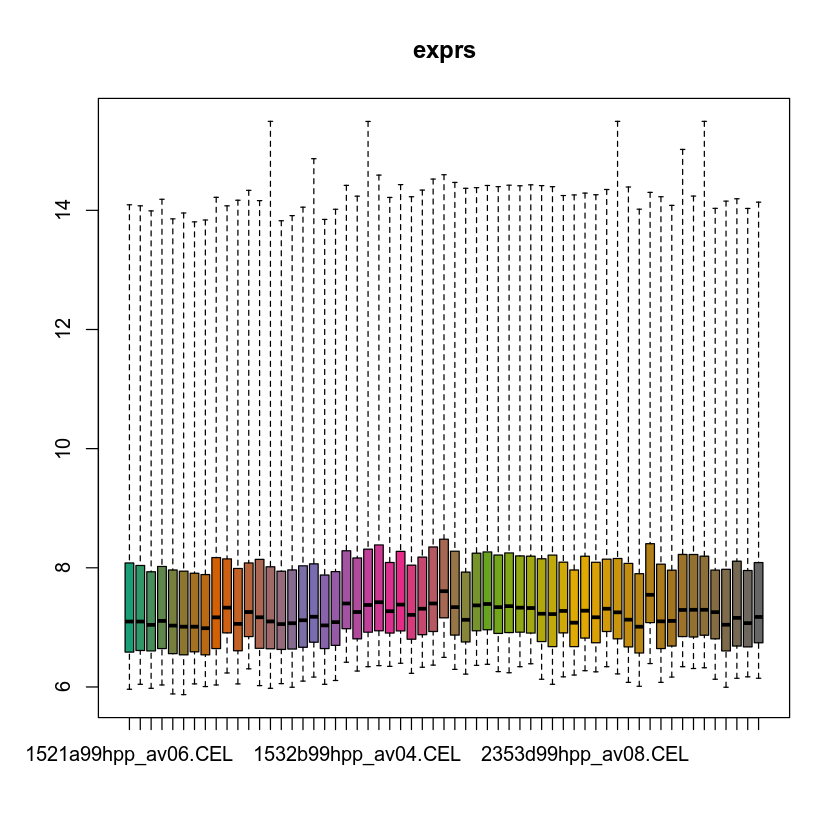

In [4]:
# Без нормализации
boxplot(affyExpressionFS)

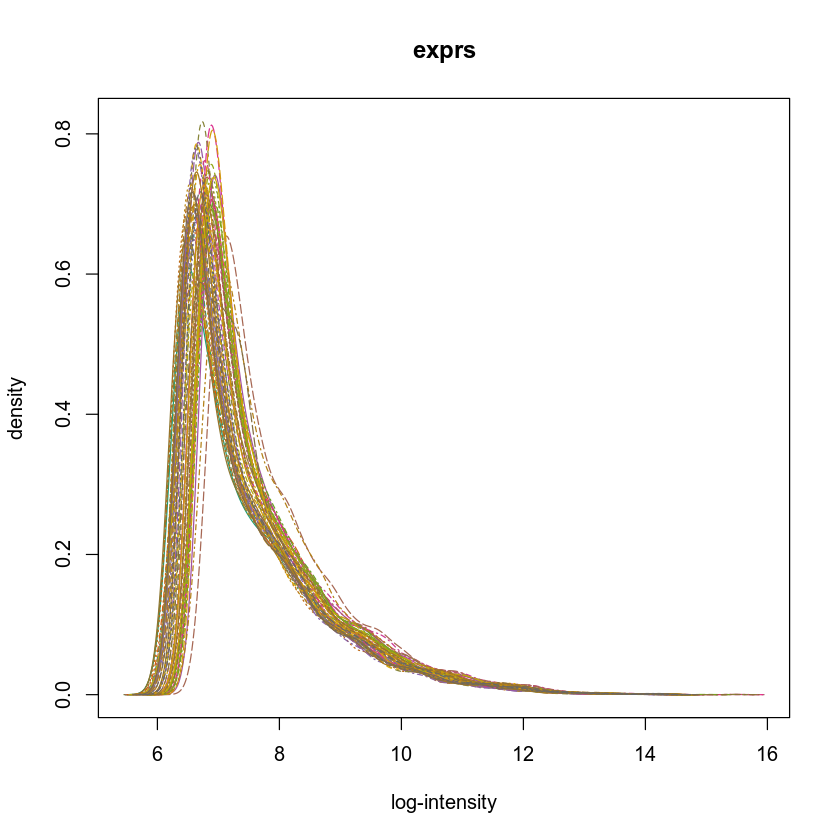

In [5]:
hist(affyExpressionFS)

In [2]:
# Выводим все доступные методы нормализации
backgroundCorrectionMethods()

[1] "rma"  "mas"  "LESN"

### RMA

* MM can detect true signal for some probes(but others seem to represent “background”)
* Difference of PM from “background” increases with concentration - (in spike-in)
* Probe effects exist
* The  RMA  algorithm  can  be  applied  to  the  raw  data  of  expression  arrays.

Background correcting... 
OK



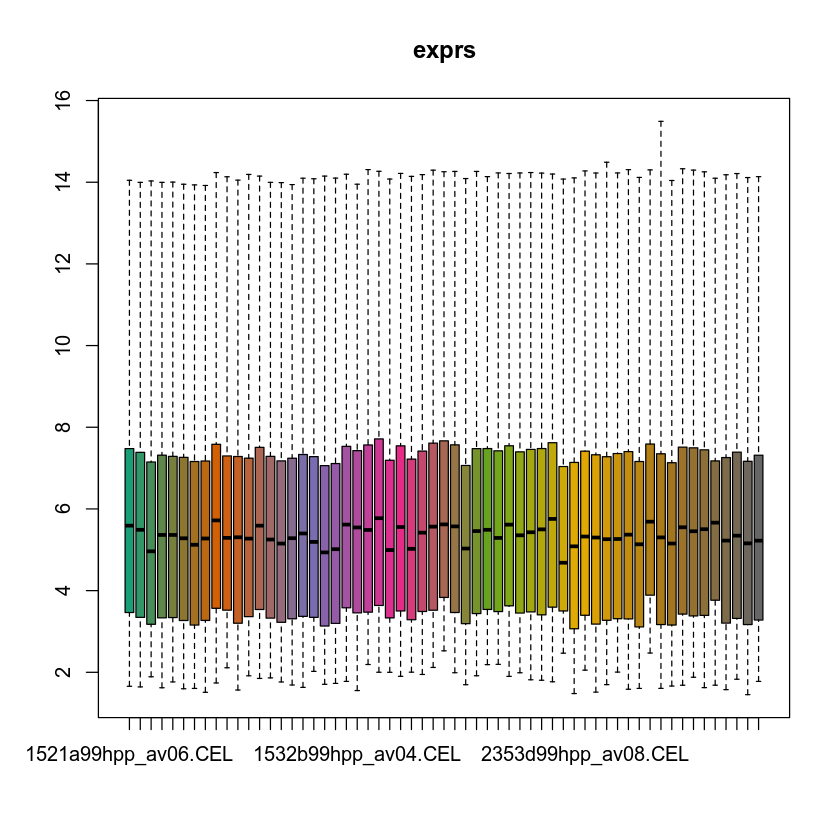

In [6]:
rma_affy <- backgroundCorrect(affyExpressionFS, method='rma')
boxplot(rma_affy)

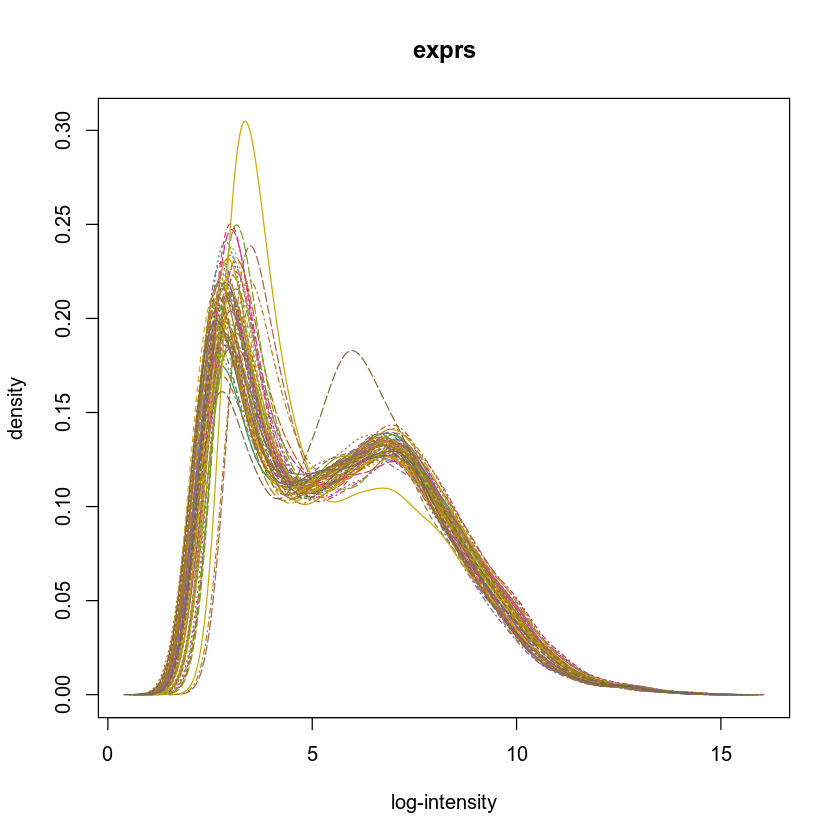

In [7]:
hist(rma_affy)

### MAS5

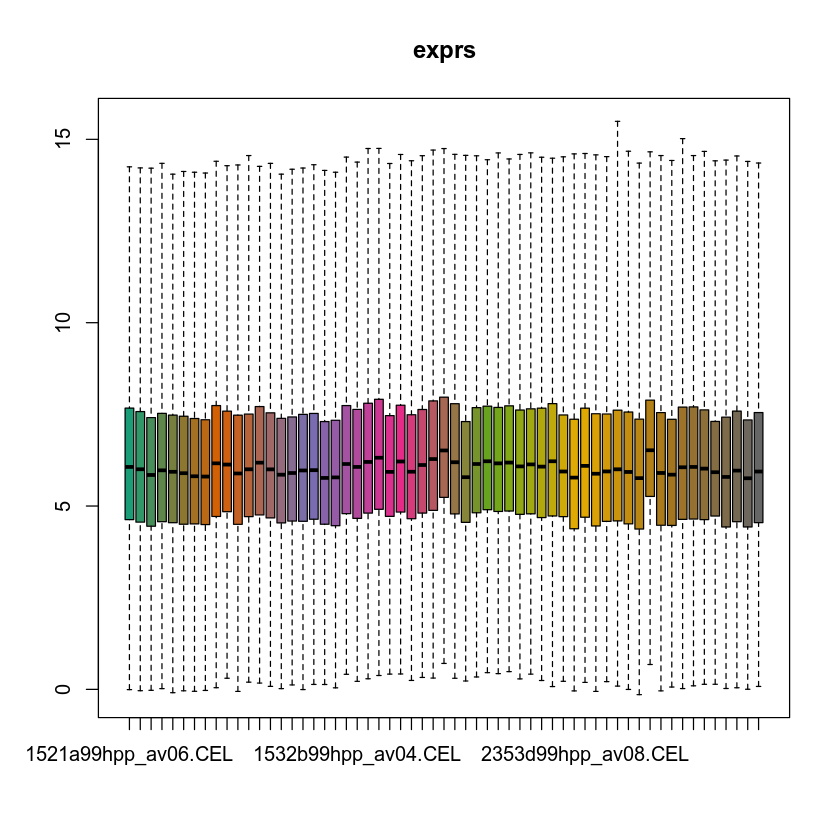

In [8]:
mas_affy <- backgroundCorrect(affyExpressionFS, method='mas') 
boxplot(mas_affy)

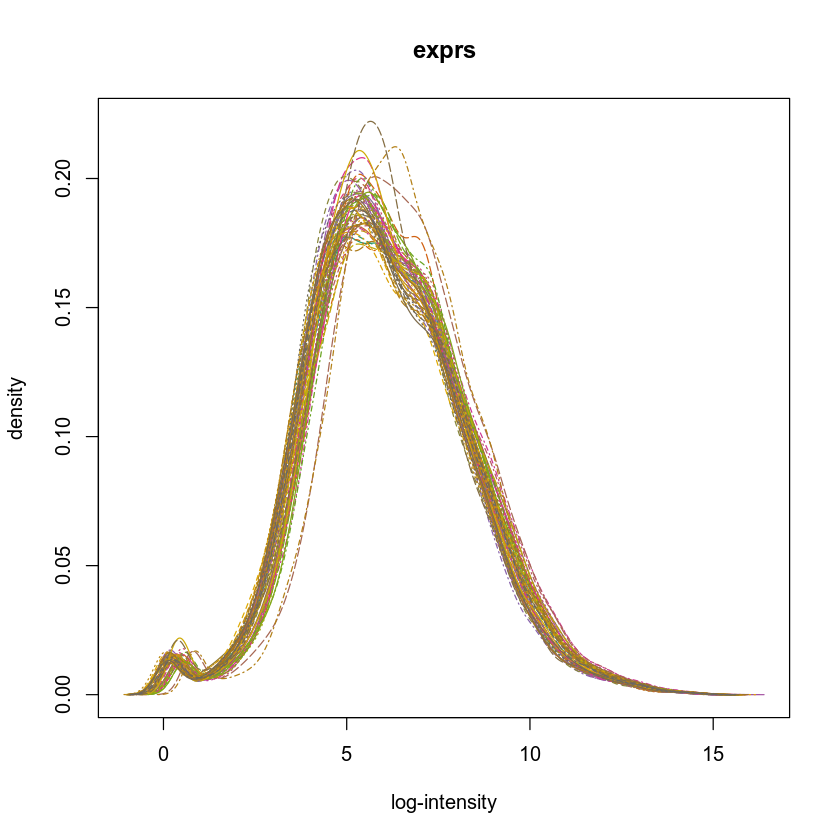

In [9]:
hist(mas_affy)

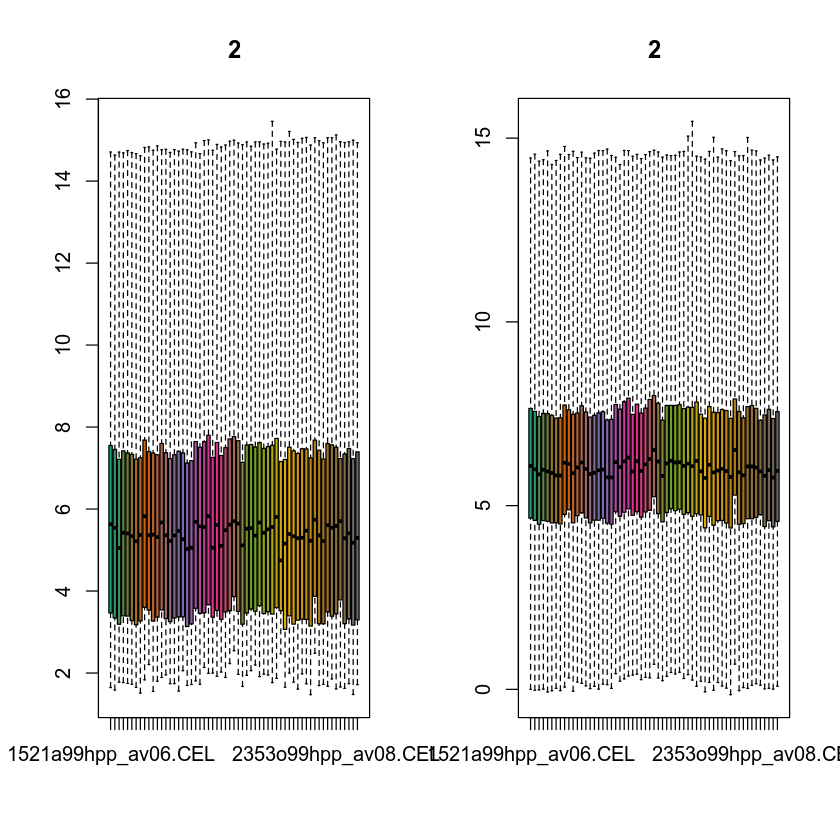

In [29]:
#par(mfrow = c(1,2)) 
layout(matrix(c(1, 2), nrow = 1, ncol = 2, byrow = TRUE))
boxplot(rma_affy, main=2)
boxplot(mas_affy, main=2)

### Полная нормализация rma

In [2]:
rma.data <- rma(affyExpressionFS)

Loading required package: RSQLite

Loading required package: DBI



Background correcting
Normalizing
Calculating Expression


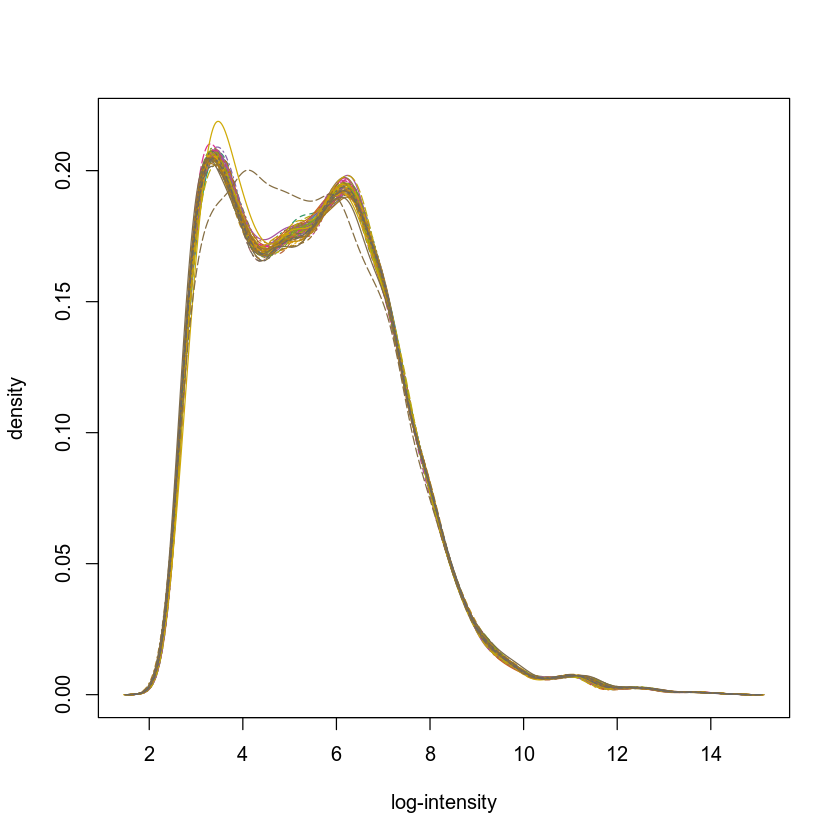

In [3]:
hist(rma.data)

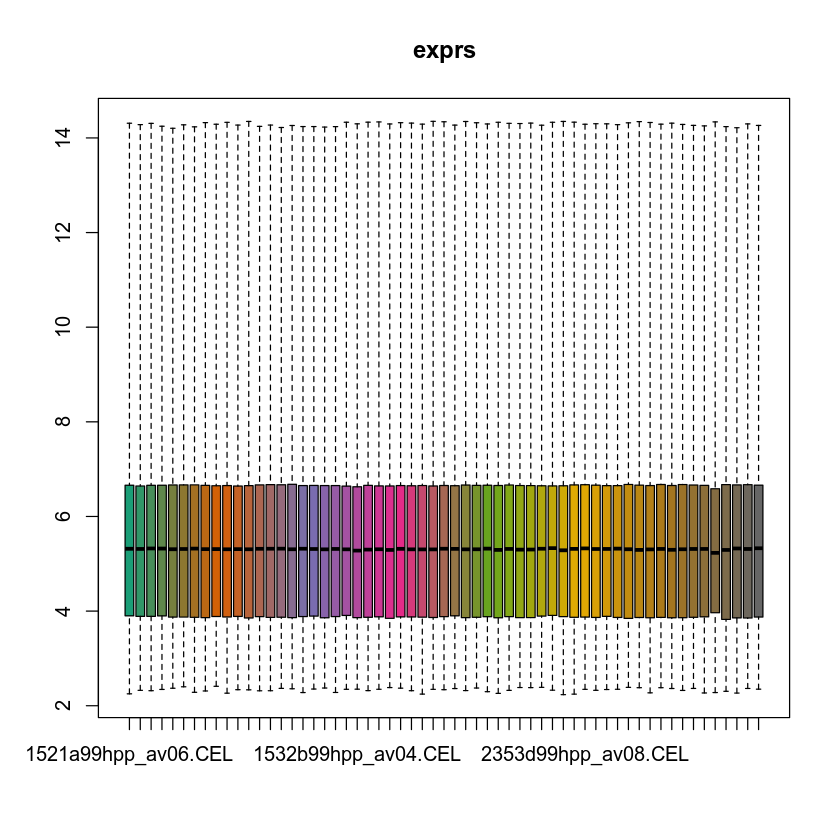

In [4]:
boxplot(rma.data)